#**Exploratory analysis**
Present some basic statistics or intuitions about your dataset. This is your opportunity to show any patterns or abnormalities you found in the dataset, even if they were not directly related to the main goals of the project.

###**Solution and insights**
Discuss your solution to the problem, and any insights gained from this process. For example, if your problem was a classification problem, describe

**(a)** the features you decided to use and why, \
**(b)** which classifier(s), \
**(c)** a summary of the results obtained, and \
**(d)** an analysis of the model learnt by the classifier. Which features were most important? which ones were useless? did you find anything surprising?

Notes:

should remove orbiting body bc no insight \
remove neo id and name for modeling \
got the diff btw diameter min and max \

Need to:
normalize except response
write cvs for new ds

##Import Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving nearest-earth-objects(1910-2024).csv to nearest-earth-objects(1910-2024).csv


##Inspecting the Dataset

In [4]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [5]:
df.dtypes

,0
neo_id,int64
name,object
absolute_magnitude,float64
estimated_diameter_min,float64
estimated_diameter_max,float64
orbiting_body,object
relative_velocity,float64
miss_distance,float64
is_hazardous,bool


In [6]:
df.shape

(338199, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


Describe the data

In [8]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [9]:
df.describe(include=['object'])

,name,orbiting_body
count,338199,338199
unique,33514,1
top,277810 (2006 FV35),Earth
freq,211,338199


In [10]:
df.columns.tolist()

['neo_id',
 'name',
 'absolute_magnitude',
 'estimated_diameter_min',
 'estimated_diameter_max',
 'orbiting_body',
 'relative_velocity',
 'miss_distance',
 'is_hazardous']

In [11]:
df.nunique()

,0
neo_id,33514
name,33514
absolute_magnitude,1778
estimated_diameter_min,1778
estimated_diameter_max,1778
orbiting_body,1
relative_velocity,338189
miss_distance,337826
is_hazardous,2


## Wrangling the Dataset

Dropped orbiting_body because there is only one unique value.

In [12]:
df.drop(columns=['orbiting_body'], inplace=True)

Checked if there were null values

In [13]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
relative_velocity,0
miss_distance,0
is_hazardous,0


Viewed rows with missing values. There were only 28 of them with response all False, so I thought it'd be best to remove them.

In [14]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)

          neo_id          name  absolute_magnitude  estimated_diameter_min  \
107508   3511355   (2010 DJ77)                 NaN                     NaN   
111671   3511355   (2010 DJ77)                 NaN                     NaN   
114171   3511355   (2010 DJ77)                 NaN                     NaN   
116688   3511355   (2010 DJ77)                 NaN                     NaN   
146059   3511355   (2010 DJ77)                 NaN                     NaN   
148836   3511355   (2010 DJ77)                 NaN                     NaN   
150446   3511355   (2010 DJ77)                 NaN                     NaN   
153108   3511355   (2010 DJ77)                 NaN                     NaN   
155973   3511355   (2010 DJ77)                 NaN                     NaN   
186857   3511355   (2010 DJ77)                 NaN                     NaN   
190088   3511355   (2010 DJ77)                 NaN                     NaN   
191131   3511355   (2010 DJ77)                 NaN              

Dropped rows with NA

In [15]:
df = df.dropna()

When I created a correlation matrix, the response variable shows no correlation wiht any of the variables. I wonder if it is due to the fact I sampled w/o intentionally specifying some proportion of response='True' and did not normalize.

##Feature Engineering
Created new features called average estimated diameter and range estimated diameter, and I dropped the estimated diameter max and min

In [16]:
df['avg_estim_diameter'] = (df['estimated_diameter_max'] + df['estimated_diameter_min']) / 2
df['range_estim_diameter'] = df['estimated_diameter_max'] - df['estimated_diameter_min']
# Drop the originals?
df.drop(columns=['estimated_diameter_max', 'estimated_diameter_min'], inplace=True)
print(df)

          neo_id                name  absolute_magnitude  relative_velocity  \
0        2162117  162117 (1998 SD15)              19.140       71745.401048   
1        2349507    349507 (2008 QY)              18.500      109949.757148   
2        2455415    455415 (2003 GA)              21.450       24865.506798   
3        3132126           (2002 PB)              20.630       78890.076805   
4        3557844           (2011 DW)              22.700       56036.519484   
...          ...                 ...                 ...                ...   
338194  54403809          (2023 VS4)              28.580       56646.985988   
338195  54415298          (2023 XW5)              28.690       21130.768947   
338196  54454871          (2024 KJ7)              21.919       11832.041031   
338197  54456245           (2024 NE)              23.887       56198.382733   
338198  54460573          (2024 NH3)              22.951       42060.357830   

        miss_distance  is_hazardous  avg_estim_diam

Changed is_hazard to 0s and 1s for easier processing.

In [17]:
df['is_hazardous'] = df['is_hazardous'].map({True: 1, False: 0})
print(df)

          neo_id                name  absolute_magnitude  relative_velocity  \
0        2162117  162117 (1998 SD15)              19.140       71745.401048   
1        2349507    349507 (2008 QY)              18.500      109949.757148   
2        2455415    455415 (2003 GA)              21.450       24865.506798   
3        3132126           (2002 PB)              20.630       78890.076805   
4        3557844           (2011 DW)              22.700       56036.519484   
...          ...                 ...                 ...                ...   
338194  54403809          (2023 VS4)              28.580       56646.985988   
338195  54415298          (2023 XW5)              28.690       21130.768947   
338196  54454871          (2024 KJ7)              21.919       11832.041031   
338197  54456245           (2024 NE)              23.887       56198.382733   
338198  54460573          (2024 NH3)              22.951       42060.357830   

        miss_distance  is_hazardous  avg_estim_diam

In [18]:
df.isna().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
relative_velocity,0
miss_distance,0
is_hazardous,0
avg_estim_diameter,0
range_estim_diameter,0


## Create Nasa File for Modeling

Checking avg_estim_diameter and range_estim_diameter

In [21]:
df[['avg_estim_diameter', 'range_estim_diameter']]

,avg_estim_diameter,range_estim_diameter
0,0.639061,0.488200
1,0.858109,0.655537
2,0.220568,0.168499
3,0.321768,0.245809
4,0.124035,0.094754
...,...,...
338194,0.008271,0.006318
338195,0.007862,0.006006
338196,0.177723,0.135768
338197,0.071803,0.054853


In [25]:
from sklearn.preprocessing import StandardScaler

features2 = df[['avg_estim_diameter', 'range_estim_diameter']]

scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(df[['avg_estim_diameter', 'range_estim_diameter']]), columns=features2.columns)
test

,avg_estim_diameter,range_estim_diameter
0,0.755531,0.755531
1,1.186833,1.186833
2,-0.068476,-0.068476
3,0.130785,0.130785
4,-0.258549,-0.258549
...,...,...
338166,-0.486486,-0.486486
338167,-0.487290,-0.487290
338168,-0.152838,-0.152838
338169,-0.361392,-0.361392


In [32]:
test2 = pd.DataFrame(df['avg_estim_diameter']-df['range_estim_diameter'])
test2.max()
test2.mean()
test2.median()

,0
0,0.027963


Normalize the dataset excl. response, neo_id, and name. Write cvs.

In [ ]:
from sklearn.preprocessing import StandardScaler
# Separate the features and response variable
features = df.drop(columns=['neo_id', 'name', 'is_hazardous'])
neo_id = df['neo_id']
name = df['name']
response = df['is_hazardous']  # Keep the response variable separate

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the normalized features with the response variable
df_normalized = pd.concat([features_normalized, response.reset_index(drop=True), neo_id, name], axis=1)
df_normalized.to_csv('nasa.csv', index=False)
print(df_normalized.head())

   absolute_magnitude  relative_velocity  miss_distance  avg_estim_diameter  \
0           -1.302731           0.783541       0.799465            0.755531   
1           -1.522570           2.230682       0.686701            1.186833   
2           -0.509247          -0.992221       1.235742           -0.068476   
3           -0.790916           1.054174      -0.536198            0.130785   
4           -0.079872           0.188505       1.038946           -0.258549   

   range_estim_diameter  is_hazardous     neo_id                name  
0              0.755531           0.0  2162117.0  162117 (1998 SD15)  
1              1.186833           1.0  2349507.0    349507 (2008 QY)  
2             -0.068476           0.0  2455415.0    455415 (2003 GA)  
3              0.130785           0.0  3132126.0           (2002 PB)  
4             -0.258549           0.0  3557844.0           (2011 DW)  


### Sample Data

Because there are over 300k observations, I sampled 10% of the df for visualization. I also wanted to maintain the proportion of true to false cases in response.

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'is_hazardous' is your binary response variable
df_sampled, _ = train_test_split(df, test_size=0.9, stratify=df['is_hazardous'], random_state=1)

# Display the size and class distribution of the sampled data
print("Sampled Data Size:", df_sampled.shape)
print("Sampled Data Class Distribution:\n", df_sampled['is_hazardous'].value_counts(normalize=True))

Sampled Data Size: (33817, 8)
Sampled Data Class Distribution:
 is_hazardous
0    0.872372
1    0.127628
Name: proportion, dtype: float64


Normalized sample

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_sampled is your DataFrame
scaler = StandardScaler()
df_sampled_normalized = scaler.fit_transform(df_sampled.drop(columns=['is_hazardous', 'name', 'neo_id']))

# Convert back to DataFrame and reattach the is_hazardous column
df_sampled_normalized = pd.DataFrame(df_sampled_normalized, columns=df_sampled.columns.drop(['is_hazardous', 'name', 'neo_id']))
df_sampled_normalized['is_hazardous'] = df_sampled['is_hazardous'].values

print(df_sampled_normalized.head())

   absolute_magnitude  relative_velocity  miss_distance  avg_estim_diameter  \
0            0.443587          -0.397875       0.117361           -0.408950   
1           -0.204701          -0.422797      -1.700998           -0.229925   
2            0.820897          -0.963125      -1.551508           -0.460220   
3            1.133036           0.007207       0.067436           -0.486830   
4            0.152029          -0.309288      -1.392930           -0.347146   

   range_estim_diameter  is_hazardous  
0             -0.408950             0  
1             -0.229925             0  
2             -0.460220             0  
3             -0.486830             0  
4             -0.347146             0  


In [ ]:
# Check the distribution of the original dataset
print("Original Data Class Distribution:\n", df['is_hazardous'].value_counts(normalize=True))

# Check the distribution of the sampled dataset
print("Sampled Data Class Distribution:\n", df_sampled['is_hazardous'].value_counts(normalize=True))

Original Data Class Distribution:
 is_hazardous
0    0.872366
1    0.127634
Name: proportion, dtype: float64
Sampled Data Class Distribution:
 is_hazardous
0    0.872372
1    0.127628
Name: proportion, dtype: float64


#EDA

In [ ]:
# Identify numerical columns
numerical_columns = df_sampled.select_dtypes(include=["int64", "float64"]).columns
print(numerical_columns)

Index(['neo_id', 'absolute_magnitude', 'relative_velocity', 'miss_distance',
       'is_hazardous', 'avg_estim_diameter', 'range_estim_diameter'],
      dtype='object')


##Univariate Ananlysis

###Count Plot

In [ ]:
# Assuming 'df' is your DataFrame
hazard_counts = df_sampled_normalized['is_hazardous'].value_counts()
hazard_counts

,count
is_hazardous,
0,29501
1,4316


In [ ]:
df_sampled.head()

,neo_id,name,absolute_magnitude,relative_velocity,miss_distance,is_hazardous,avg_estim_diameter,range_estim_diameter
308213,54360002,(2023 KO3),24.23,40546.837098,4.405755e+07,0,0.061312,0.046838
282518,2523817,523817 (2009 TK),22.34,39890.724993,6.416623e+06,0,0.146401,0.111840
305215,54110078,(2021 CT1),25.33,25665.806516,9.511137e+06,0,0.036944,0.028223
87744,54123272,(2021 DC1),26.24,51211.219544,4.302408e+07,0,0.024296,0.018561
316479,54171756,(2021 OK),23.38,42879.014563,1.279379e+07,0,0.090686,0.069278


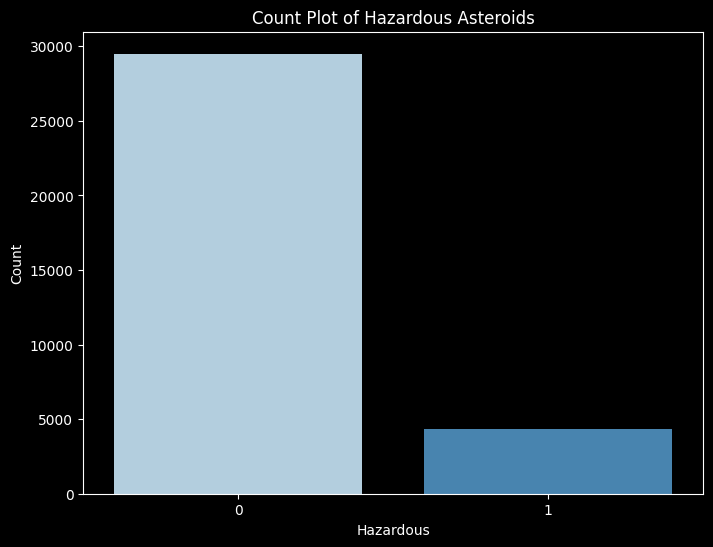

In [ ]:
# Using Matplotlib to create a count plot
plt.style.use("dark_background")
plt.figure(figsize=(8, 6))
sns.countplot(x='is_hazardous', data=df_sampled_normalized, palette='Blues')
plt.title('Count Plot of Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()

###Kernel Density Plots/Distribution of Numerical Features

['absolute_magnitude', 'relative_velocity', 'miss_distance', 'is_hazardous', 'avg_estim_diameter', 'range_estim_diameter']


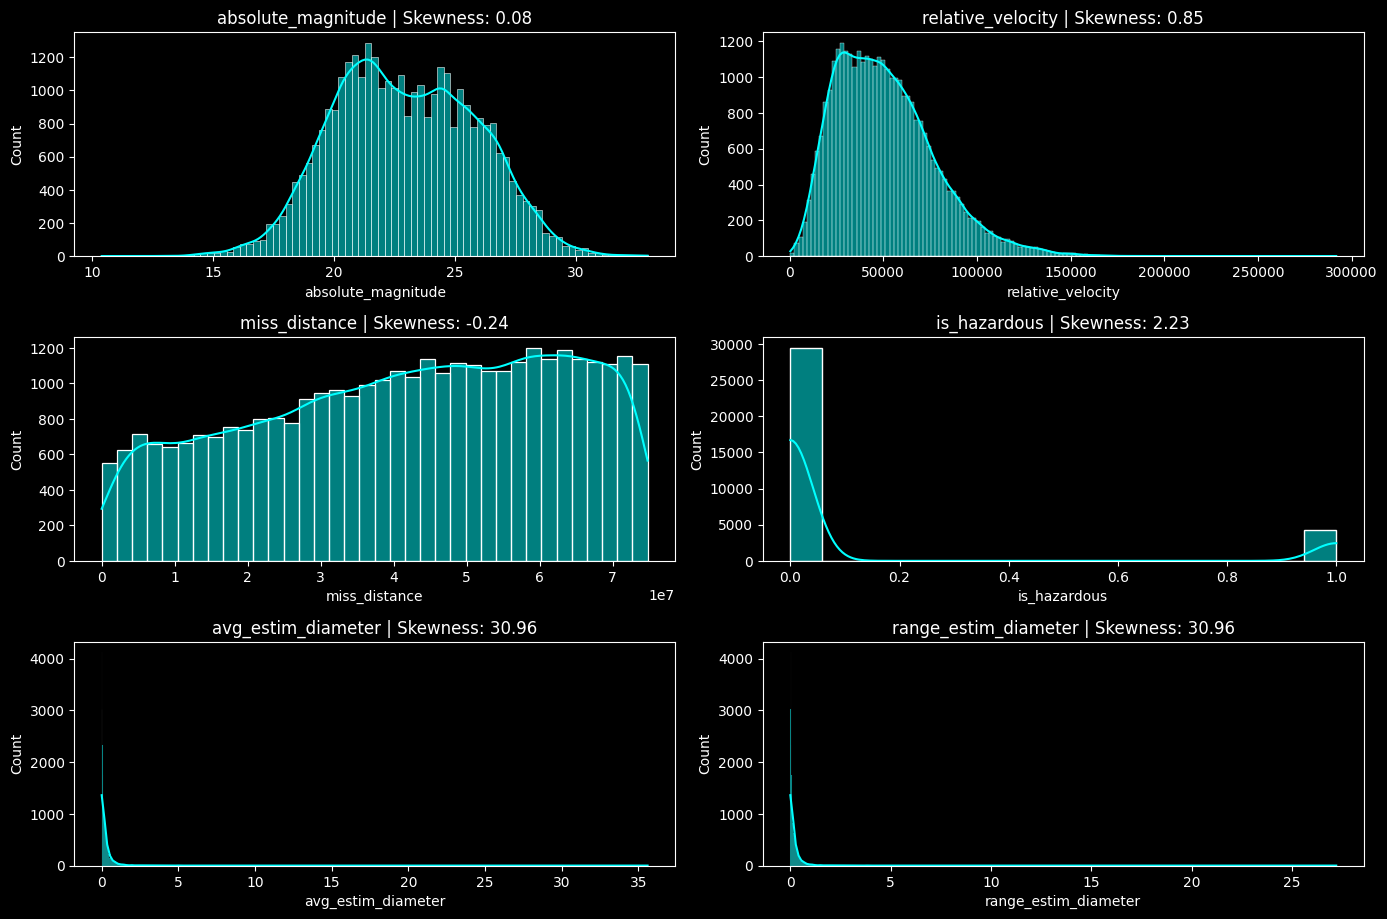

In [ ]:
# remove neo id and is hazardous
num_col2 = numerical_columns.copy().to_list()
# num_col2.pop(-3)
num_col2.pop(0)
print(num_col2)

plt.style.use("dark_background")
# Create a figure with subplots
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(num_col2) * 3))
for idx, feature in enumerate(num_col2, 1):
    plt.subplot(len(num_col2), 2, idx)
    sns.histplot(df_sampled[feature], kde=True, color="cyan")
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

##Bivariate Analysis

###Pair Plot

<Figure size 1000x600 with 0 Axes>

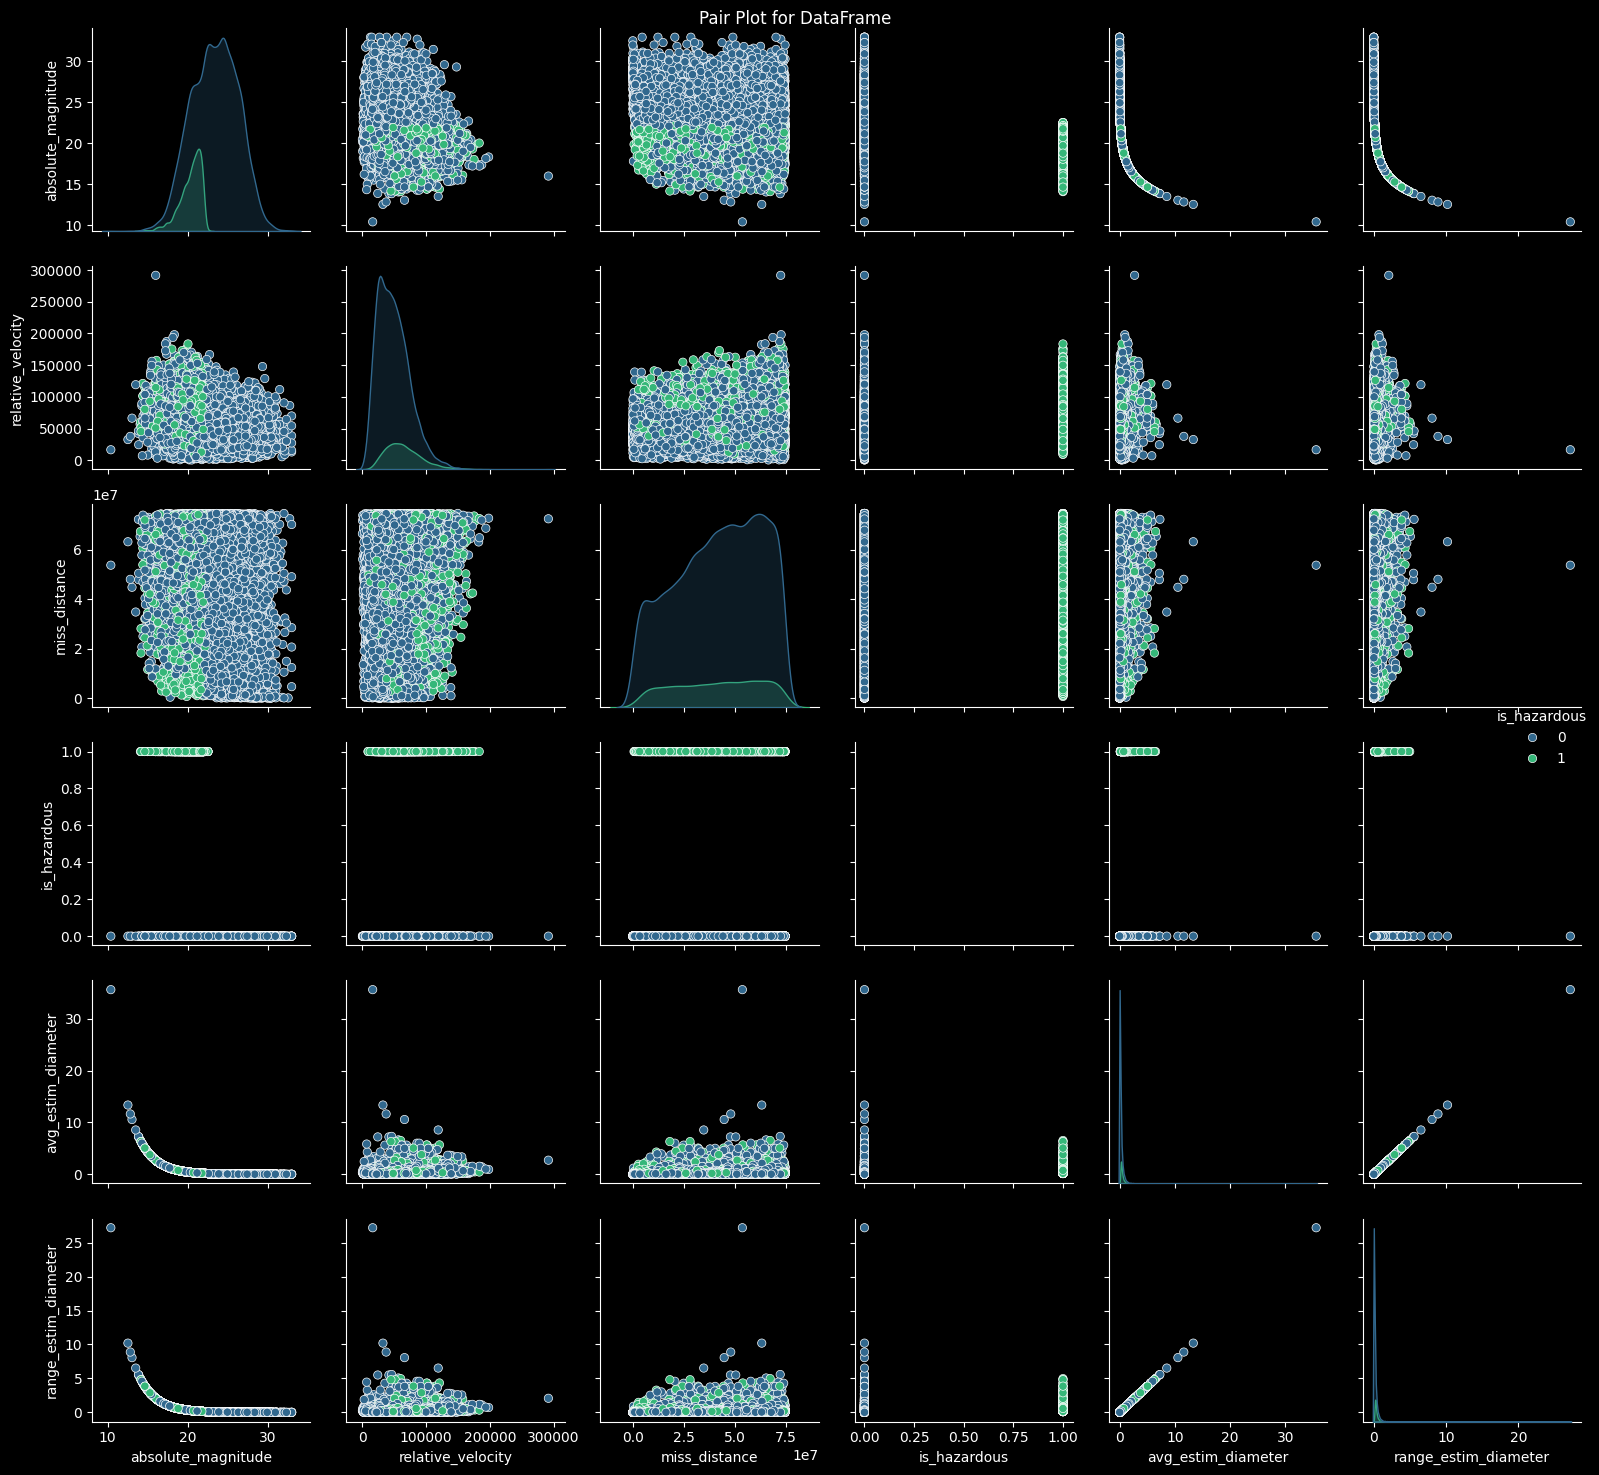

In [ ]:
# Set the color palette
sns.set_palette("Pastel1")
plt.style.use("dark_background")
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

pairplot_cols = num_col2 #+['is_hazardous']
# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df_sampled, vars=pairplot_cols, hue='is_hazardous', palette='viridis')

plt.suptitle('Pair Plot for DataFrame')
plt.tight_layout()
plt.show()

###Violin Plot

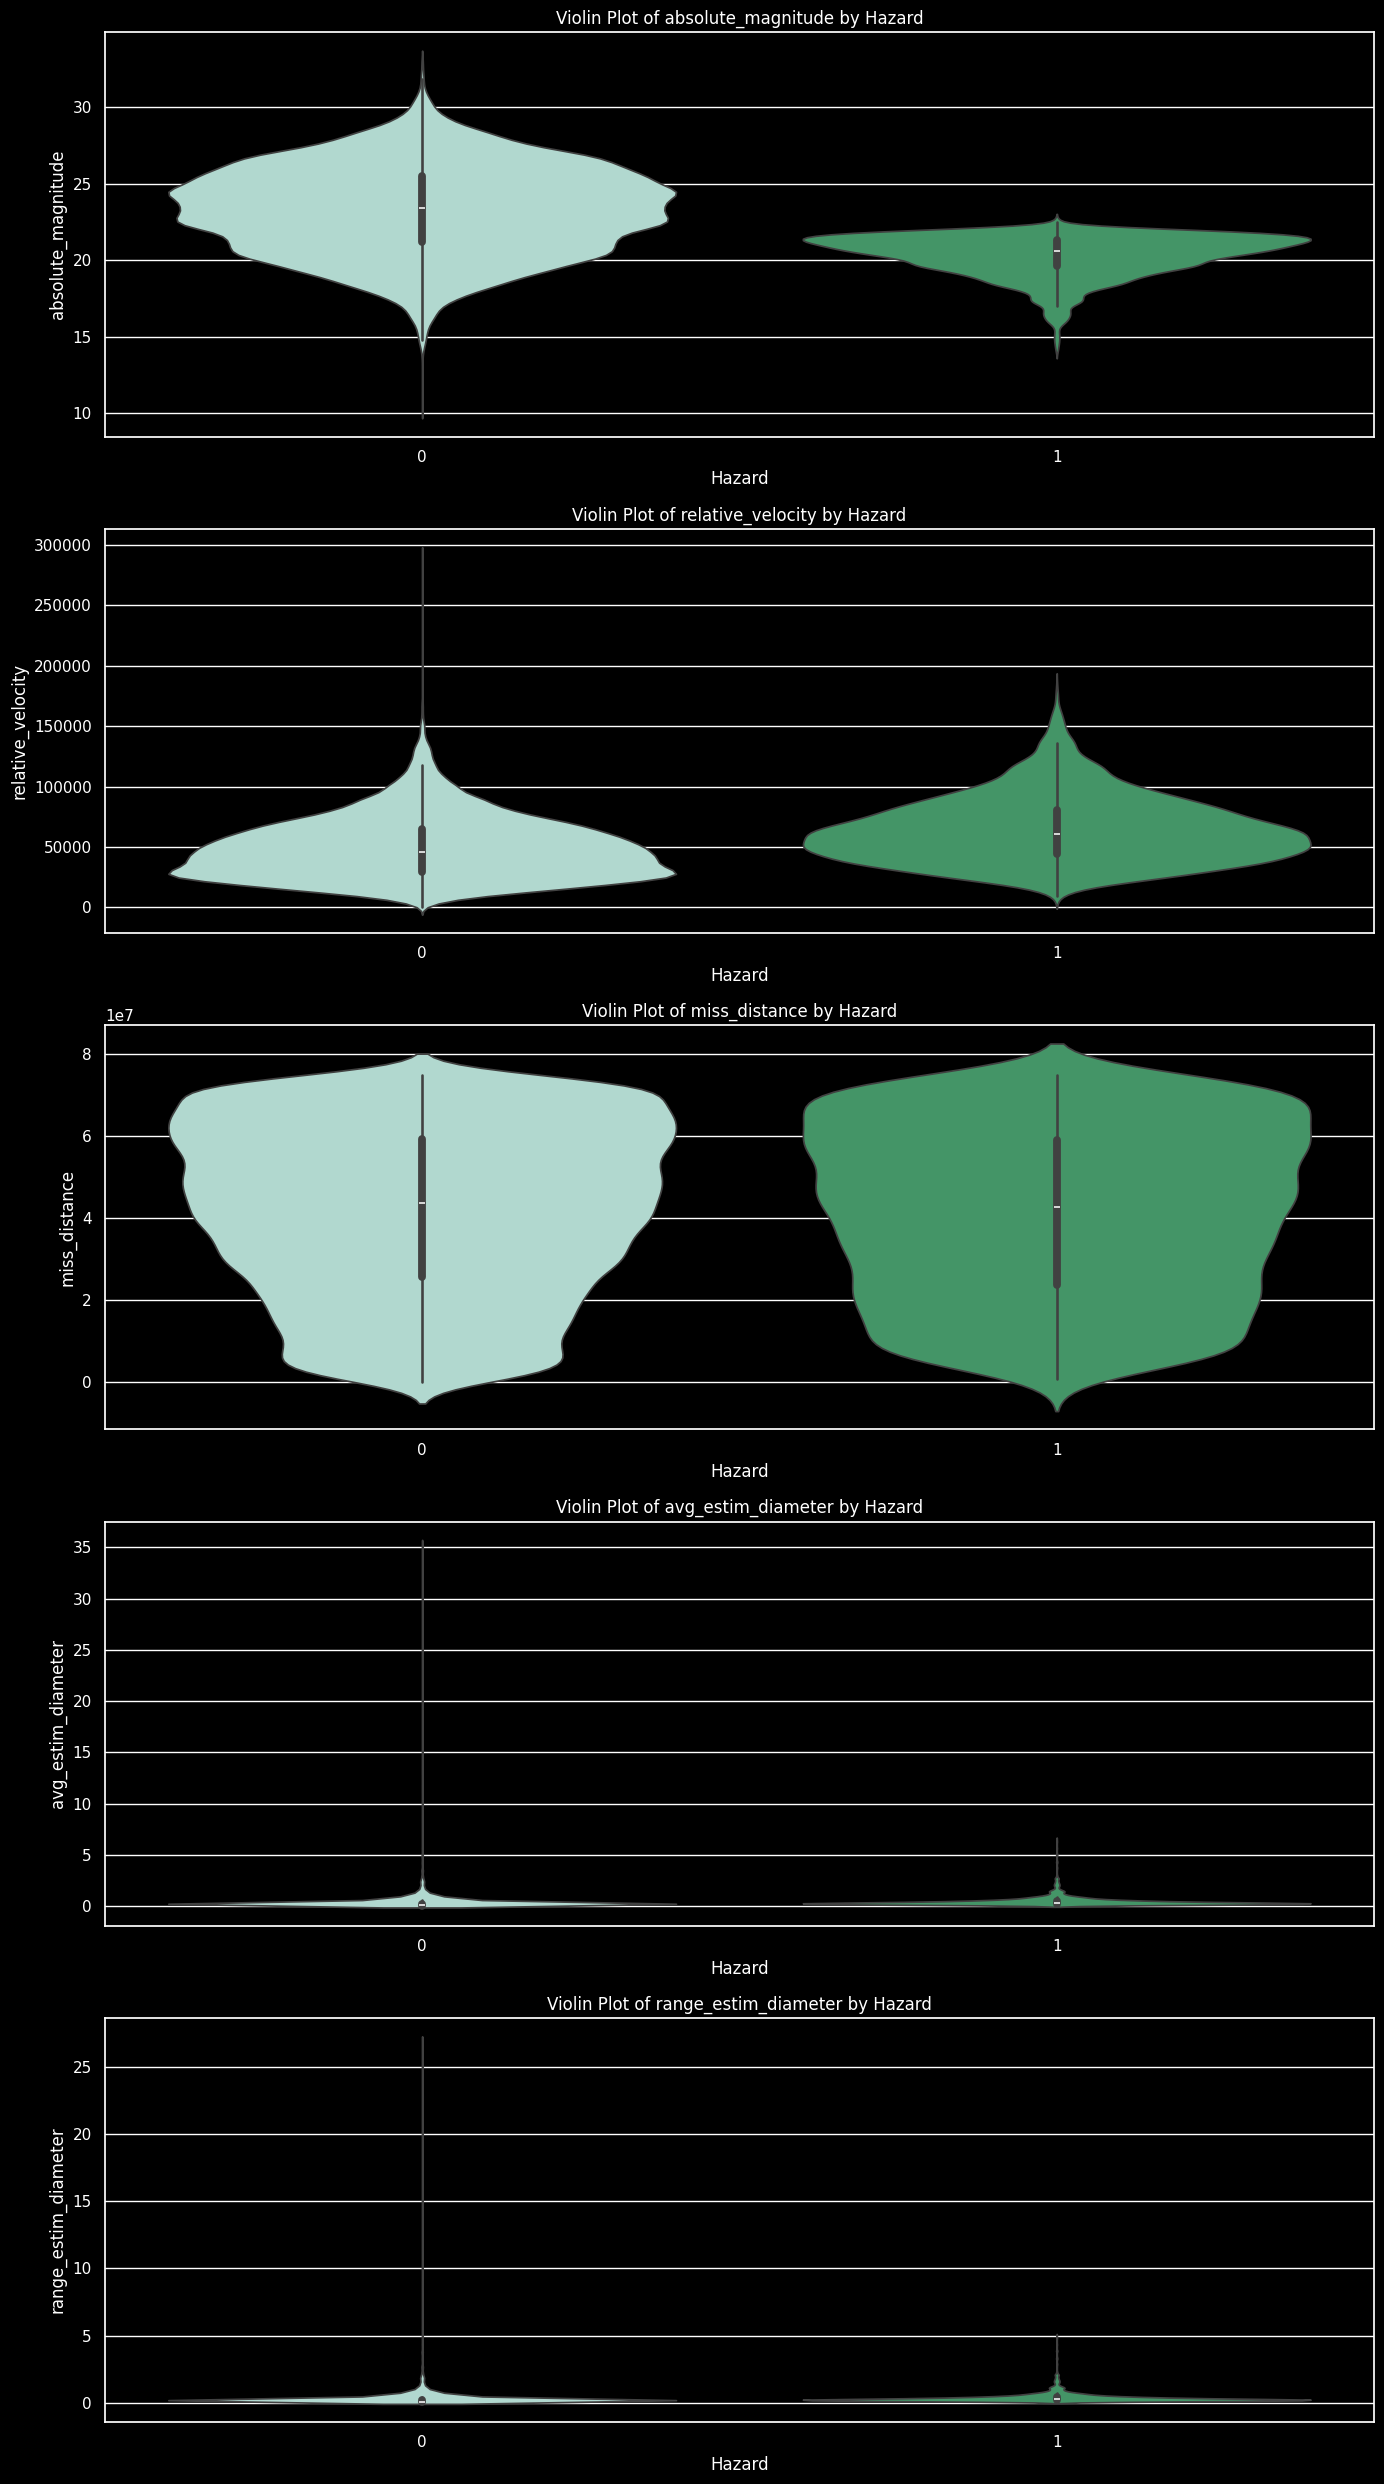

In [ ]:
sns.set(style="whitegrid")

plt.style.use("dark_background")
# Create a violin plot for each numerical predictor
plt.figure(figsize=(14, len(num_col2) * 5))

for idx, feature in enumerate(num_col2, 1):
    plt.subplot(len(num_col2), 1, idx)
    sns.violinplot(x='is_hazardous', y=feature, data=df_sampled, palette='BuGn', inner='box')
    plt.title(f'Violin Plot of {feature} by Hazard')
    plt.xlabel('Hazard')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

###Box Plot

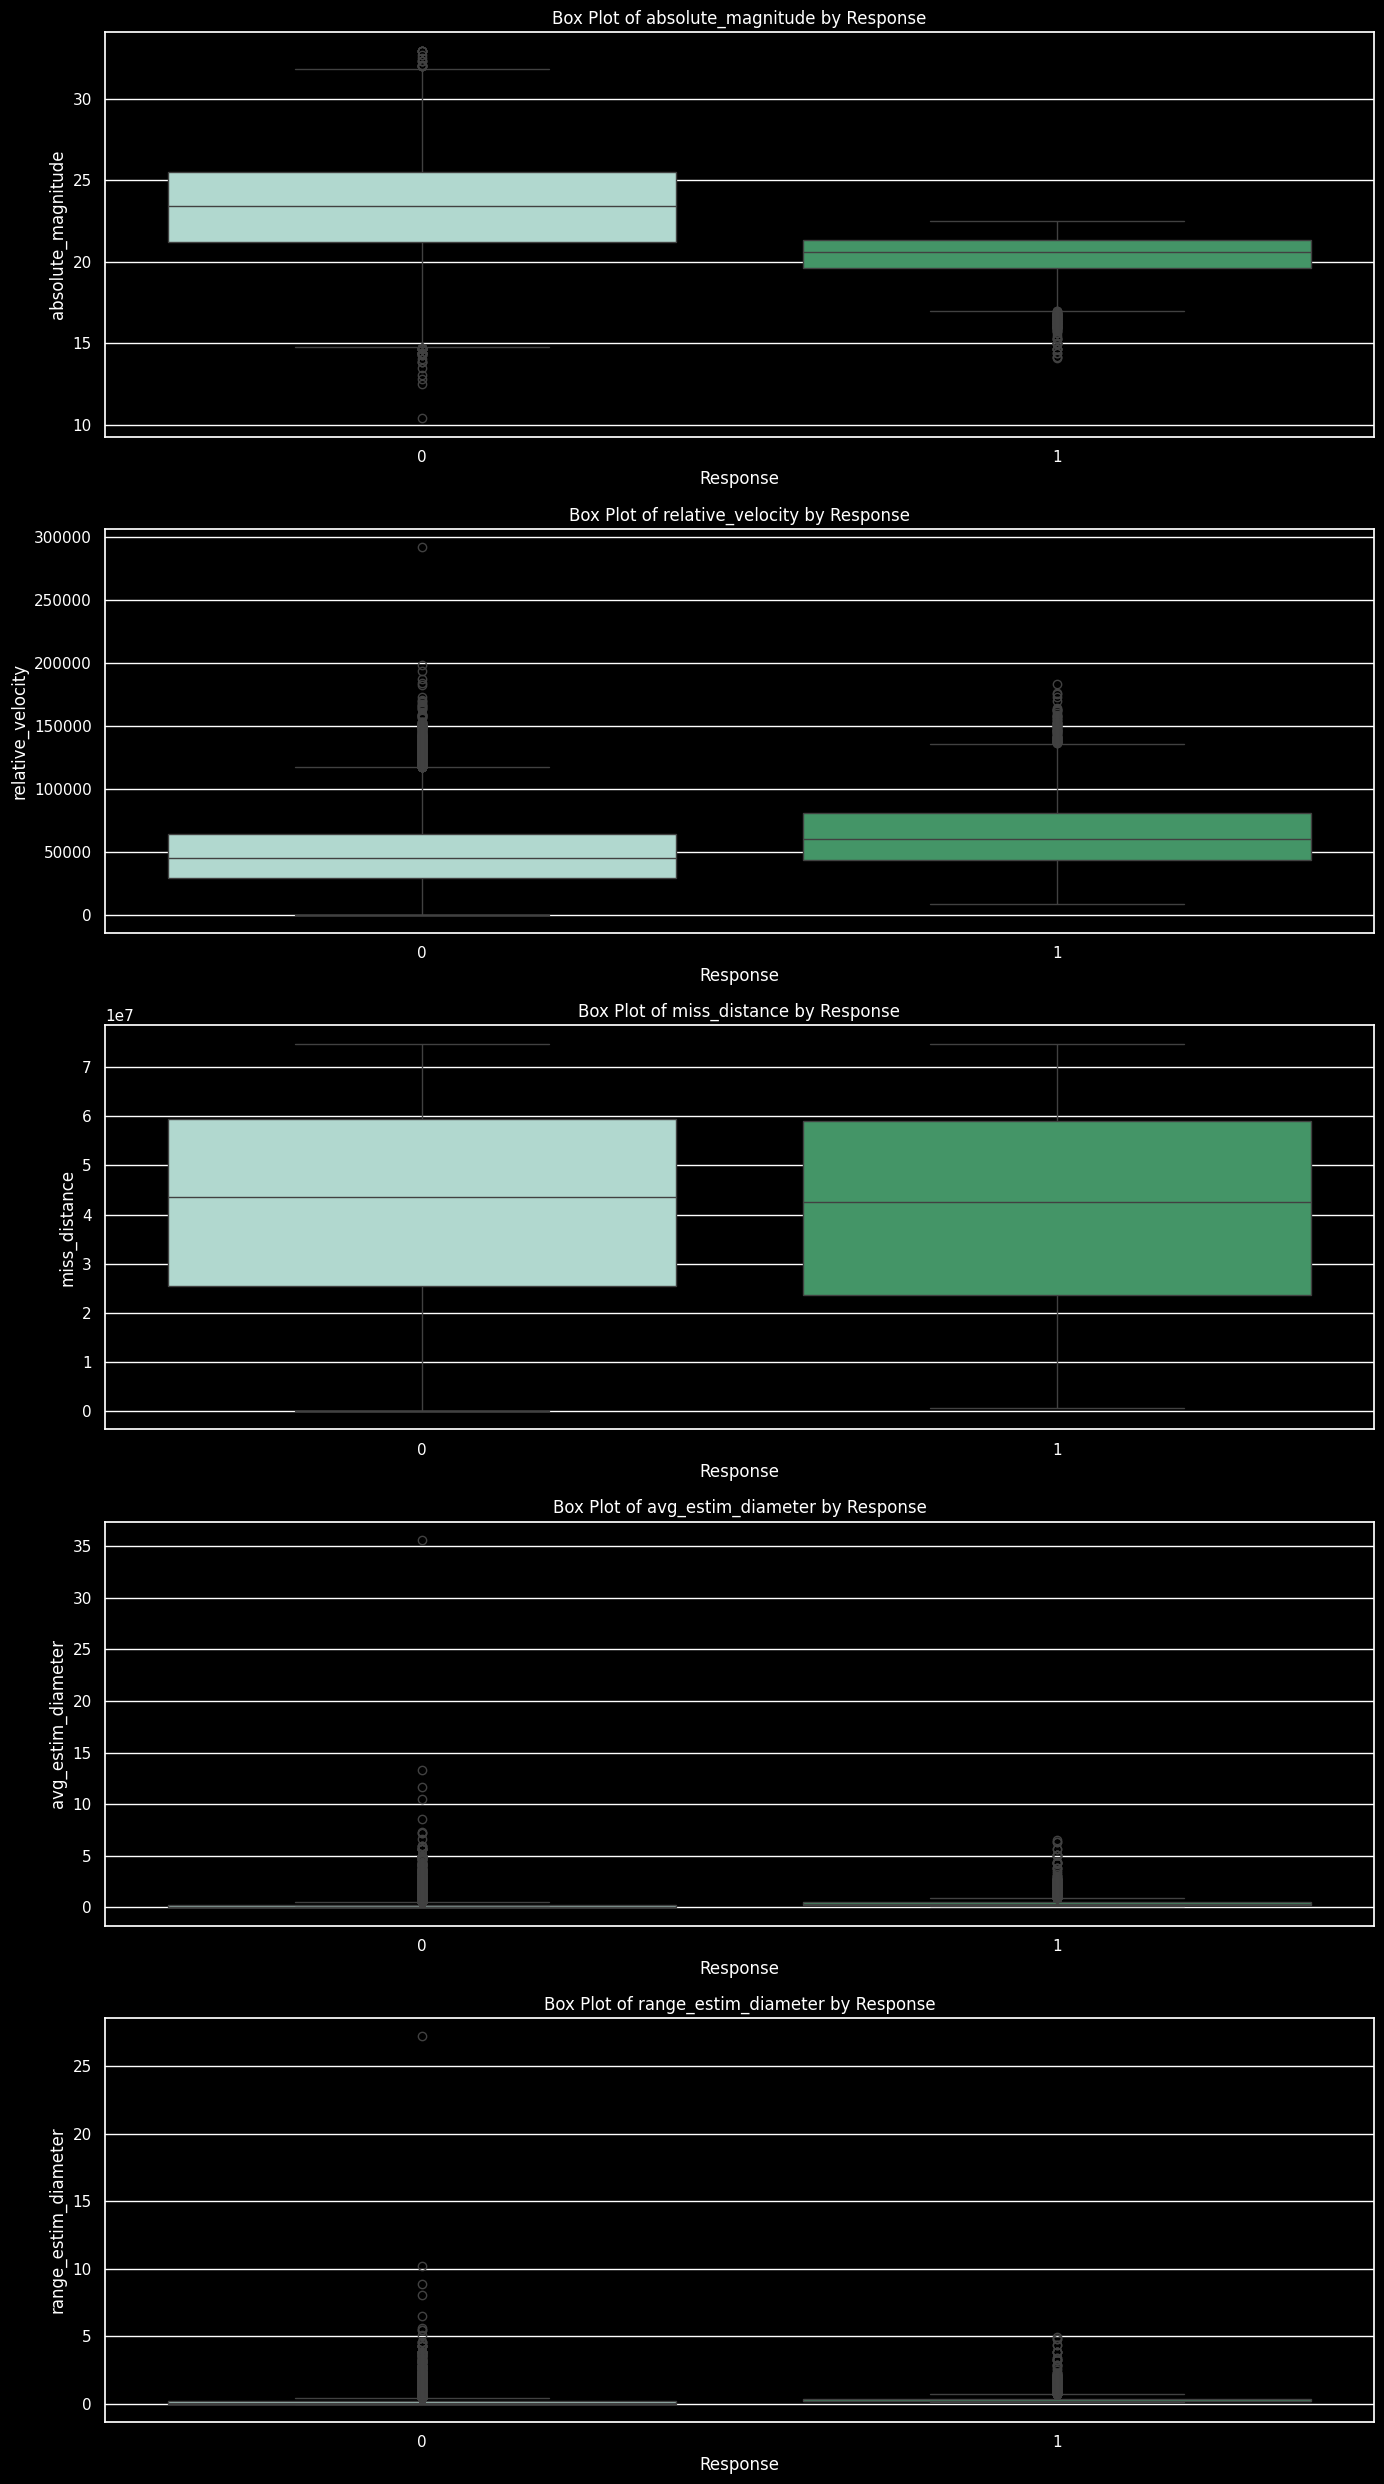

In [ ]:
sns.set(style="whitegrid")

plt.style.use("dark_background")
# Create a box plot for each numerical predictor
plt.figure(figsize=(14, len(num_col2) * 5))

for idx, feature in enumerate(num_col2, 1):
    plt.subplot(len(num_col2), 1, idx)
    sns.boxplot(x='is_hazardous', y=feature, data=df_sampled, palette="BuGn")
    plt.title(f'Box Plot of {feature} by Response')
    plt.xlabel('Response')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

##Multivariate Analysis

###Correlation Matrix

Since our response variable is imbalanced and binary, using Spearman rank correlation might provide a more meaningful relationship than Pearson correlation. Spearman correlation can capture monotonic relationships better, even if they are not linear.

**Pearson’s Correlation** \
Linear Relationships: Pearson’s correlation measures the strength and direction of the linear relationship between two continuous variables. It assumes that both variables are normally distributed and that their relationship is linear.
Sensitivity to Outliers: Pearson’s correlation is sensitive to outliers because it relies on the mean and standard deviation of the data. A few extreme values can significantly influence the correlation coefficient.
Example: If two variables increase together in a straight-line fashion, Pearson’s correlation will be close to 1.

**Spearman’s Correlation:** \
Rank-Based Correlation: Spearman’s correlation assesses the strength and direction of the monotonic relationship between two variables. Instead of using the actual data values, Spearman’s ranks the data and then computes the correlation between these ranks.
Non-Linear Relationships: Spearman’s correlation is more appropriate for data that do not have a linear relationship but do follow a monotonic trend (e.g., one variable consistently increases as the other increases, but not necessarily at a constant rate).
Less Sensitive to Outliers: Since Spearman’s uses ranks rather than raw data, it is less sensitive to outliers.

['is_hazardous', 'absolute_magnitude', 'relative_velocity', 'miss_distance', 'avg_estim_diameter', 'range_estim_diameter']


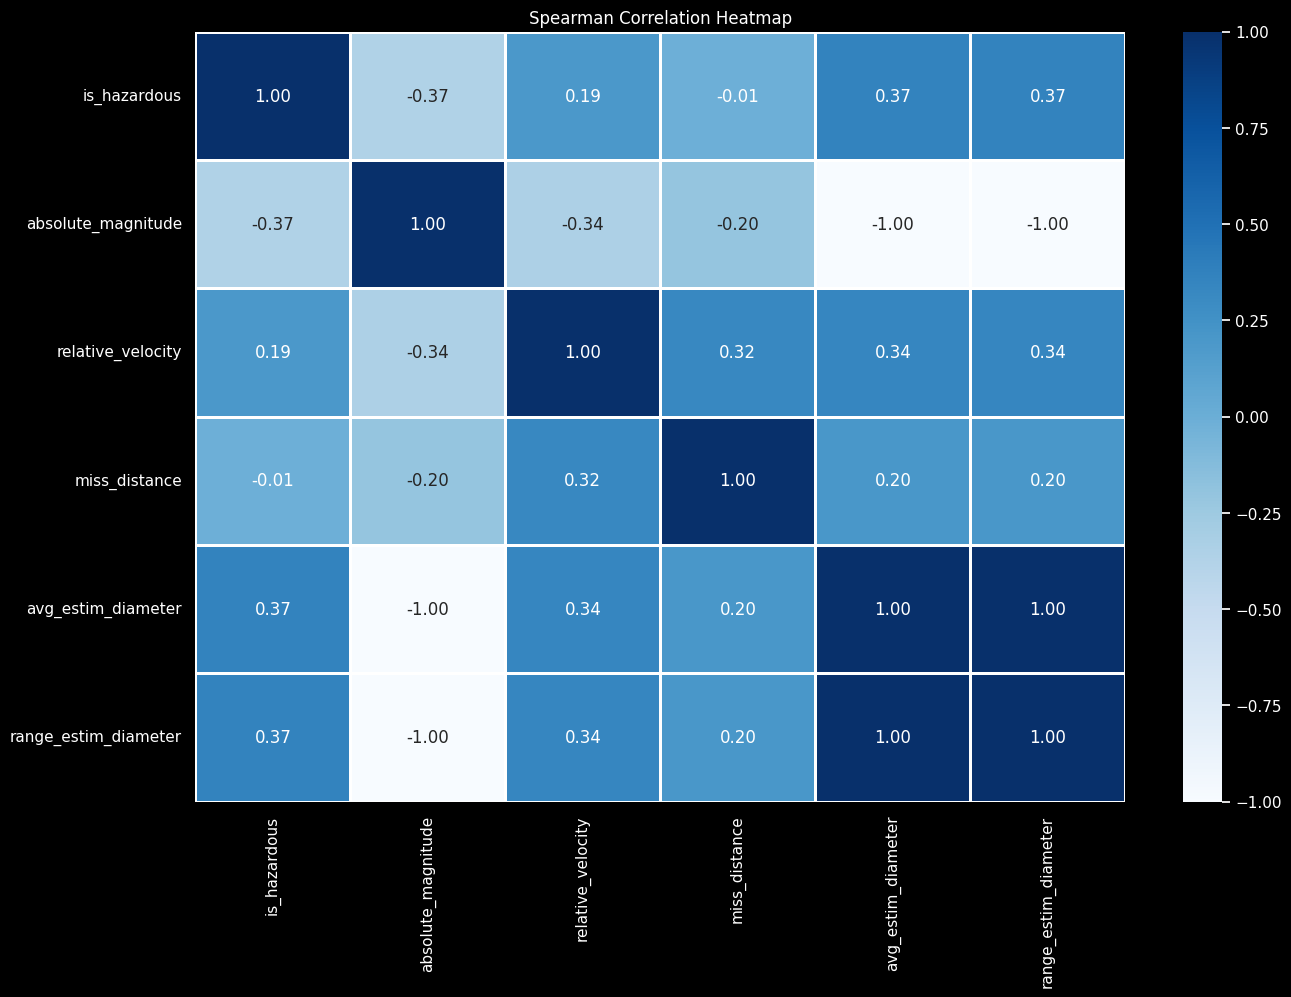

In [ ]:
plt.figure(figsize=(15, 10))
num_col3 = numerical_columns.copy().to_list()
num_col3.pop(0)
num_col3.pop(-3)
num_col3.insert(0, 'is_hazardous')
print(num_col3)

plt.style.use("dark_background")
df_numerical = df_sampled[num_col3]
spearman_corr = df_numerical.corr(method='spearman')

# Using Seaborn to create a heatmap
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='Blues', linewidths=2)

plt.title('Spearman Correlation Heatmap')
plt.show()

###Point Biserial Correlation

The Point Biserial correlation is specifically designed to measure the relationship between a binary variable and a continuous variable. It’s essentially a special case of Pearson correlation for binary data.

In [ ]:
from scipy.stats import pointbiserialr

num_col = numerical_columns.copy().to_list()
num_col.pop(-2)

# Calculate Point Biserial Correlation between the binary response and each numerical predictor
for column in num_col[1:]:
    corr, p_value = pointbiserialr(df_sampled[column], df_sampled['is_hazardous'])
    print(f"Point Biserial Correlation between {column} and is_hazardous: {corr:.3f} (p-value: {p_value:.3f})")

Point Biserial Correlation between absolute_magnitude and is_hazardous: -0.345 (p-value: 0.000)
Point Biserial Correlation between relative_velocity and is_hazardous: 0.193 (p-value: 0.000)
Point Biserial Correlation between miss_distance and is_hazardous: -0.008 (p-value: 0.140)
Point Biserial Correlation between is_hazardous and is_hazardous: 1.000 (p-value: 0.000)
Point Biserial Correlation between range_estim_diameter and is_hazardous: 0.178 (p-value: 0.000)


**Interpretation of Your Results:** \
Absolute Magnitude \
This negative correlation indicates that as the absolute magnitude increases (which generally means the object is dimmer or smaller), the likelihood of the object being hazardous decreases. The correlation is statistically significant, meaning this relationship is unlikely to be due to random chance.

Relative Velocity \
This positive correlation suggests that as the relative velocity of the object increases, the likelihood of it being hazardous also increases, but the relationship is relatively weak.This is statistically significant, indicating the relationship is likely not due to random chance.

Miss Distance \
This near-zero negative correlation indicates almost no relationship between the miss distance and the likelihood of the object being hazardous. The relatively high p-value suggests this correlation is not statistically significant, meaning this weak relationship could be due to random chance.

Average Estimated Diameter \
This positive correlation suggests that as the average estimated diameter increases, the likelihood of the object being hazardous increases slightly. Statistically significant, indicating the relationship is unlikely to be due to random chance.

**Summary:**
Significant Correlations: The features absolute_magnitude, relative_velocity, and avg_estim_diameter show statistically significant correlations with is_hazardous. However, the strength of these correlations varies, with absolute_magnitude showing a moderate negative correlation, while relative_velocity and avg_estim_diameter have weaker positive correlations.

Miss Distance: This feature does not appear to have a significant relationship with the hazardous status, as indicated by both the near-zero correlation and the non-significant p-value.

# Split training and testing sets in a 80-20 split

In [ ]:
from sklearn.model_selection import train_test_split
#Read normalized df
df_normalized = pd.read_csv("nasa.csv")
#Seed for reproducibility
seed = 42
#Split the DataFrame into training and testing sets (80% training, 20% testing)
train_df, test_df = train_test_split(df_normalized, test_size=0.2, random_state=seed)

# Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#Read normalized df
df_normalized = pd.read_csv("nasa.csv").set_index('name')
df_normalized = df_normalized.dropna()
#Split
X = df_normalized.drop('is_hazardous', axis=1)
y = df_normalized['is_hazardous']
#Set seed
seed = 42
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

FileNotFoundError: [Errno 2] No such file or directory: 'nasa.csv'

## Naive-Bayes (Felipe)

In [ ]:
#creating bins for numerical cols
df_normalized['abs_mag_binned'], abs_mag_bins = pd.qcut(df_normalized['absolute_magnitude'], 15, retbins=True)
df_normalized['rel_vel_binned'], rel_vel_bins = pd.qcut(df_normalized['relative_velocity'], 15, retbins=True)
df_normalized['miss_dist_binned'], miss_dist_bins = pd.qcut(df_normalized['miss_distance'], 15, retbins=True)
df_normalized['avg_diam_binned'], avg_diam_bins = pd.qcut(df_normalized['avg_estim_diameter'], 15, retbins=True)
df_normalized['range_diam_binned'], range_diam_bins = pd.qcut(df_normalized['range_estim_diameter'], 15, retbins=True)

#create the dummy variables
categorical_columns = ['abs_mag_binned', 'rel_vel_binned', 'miss_dist_binned', 'avg_diam_binned', 'range_diam_binned']
df_dummies = pd.get_dummies(df_normalized[categorical_columns], drop_first=False)

#prepare matricies
df_dummies['is_hazardous'] = df_normalized['is_hazardous']
formula = 'is_hazardous ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(col) for col in df_dummies.columns if col != 'is_hazardous']))
print(formula)

is_hazardous ~ 0 + Q("abs_mag_binned_(-4.7010000000000005, -1.433]") + Q("abs_mag_binned_(-1.433, -1.117]") + Q("abs_mag_binned_(-1.117, -0.901]") + Q("abs_mag_binned_(-0.901, -0.708]") + Q("abs_mag_binned_(-0.708, -0.526]") + Q("abs_mag_binned_(-0.526, -0.351]") + Q("abs_mag_binned_(-0.351, -0.159]") + Q("abs_mag_binned_(-0.159, 0.0575]") + Q("abs_mag_binned_(0.0575, 0.267]") + Q("abs_mag_binned_(0.267, 0.49]") + Q("abs_mag_binned_(0.49, 0.703]") + Q("abs_mag_binned_(0.703, 0.92]") + Q("abs_mag_binned_(0.92, 1.188]") + Q("abs_mag_binned_(1.188, 1.531]") + Q("abs_mag_binned_(1.531, 3.657]") + Q("rel_vel_binned_(-1.9269999999999998, -1.27]") + Q("rel_vel_binned_(-1.27, -1.058]") + Q("rel_vel_binned_(-1.058, -0.89]") + Q("rel_vel_binned_(-0.89, -0.729]") + Q("rel_vel_binned_(-0.729, -0.561]") + Q("rel_vel_binned_(-0.561, -0.388]") + Q("rel_vel_binned_(-0.388, -0.217]") + Q("rel_vel_binned_(-0.217, -0.0469]") + Q("rel_vel_binned_(-0.0469, 0.132]") + Q("rel_vel_binned_(0.132, 0.323]") + Q(

In [ ]:
#create df
Y, X = dmatrices(formula, df_dummies, return_type='dataframe')
y = Y['is_hazardous'].values

In [ ]:
#split sets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
model = MultinomialNB()
model.fit(X_train, y_train)

#make preds
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#calc accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.7345
Testing Accuracy: 0.7360


In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[41733 17279]
 [  573  8044]]


In [ ]:
feature_stats = pd.DataFrame({
    'Feature Prob (Positive class)': np.exp(model.feature_log_prob_[1]),
    'Feature Prob (Negative class)': np.exp(model.feature_log_prob_[0])
}, index=X.columns.values)

feature_stats.head()

,Feature Prob (Positive class),Feature Prob (Negative class)
"Q(""abs_mag_binned_(-4.7010000000000005, -1.433]"")[False]",0.147495,0.158614
"Q(""abs_mag_binned_(-4.7010000000000005, -1.433]"")[True]",0.022942,0.009654
"Q(""abs_mag_binned_(-1.433, -1.117]"")[T.True]",0.023504,0.009590
"Q(""abs_mag_binned_(-1.117, -0.901]"")[T.True]",0.025044,0.009110
"Q(""abs_mag_binned_(-0.901, -0.708]"")[T.True]",0.028167,0.008799


In [ ]:
feature_stats['Positive/Negative Ratio'] = feature_stats['Feature Prob (Positive class)'] / feature_stats['Feature Prob (Negative class)']
feature_stats['Importance'] = np.abs(np.log(feature_stats['Positive/Negative Ratio']))
feature_stats[['Positive/Negative Ratio','Importance']].head()

,Positive/Negative Ratio,Importance
"Q(""abs_mag_binned_(-4.7010000000000005, -1.433]"")[False]",0.929897,0.072681
"Q(""abs_mag_binned_(-4.7010000000000005, -1.433]"")[True]",2.376500,0.865629
"Q(""abs_mag_binned_(-1.433, -1.117]"")[T.True]",2.451058,0.896520
"Q(""abs_mag_binned_(-1.117, -0.901]"")[T.True]",2.748946,1.011217
"Q(""abs_mag_binned_(-0.901, -0.708]"")[T.True]",3.200990,1.163460


In [ ]:
feature_stats.sort_values(by='Importance', ascending=False)[:10]

,Feature Prob (Positive class),Feature Prob (Negative class),Positive/Negative Ratio,Importance
"Q(""range_diam_binned_(-0.349, -0.3]"")[T.True]",0.000005,0.013136,0.000376,7.887039
"Q(""avg_diam_binned_(-0.349, -0.3]"")[T.True]",0.000005,0.013136,0.000376,7.887039
"Q(""avg_diam_binned_(-0.458, -0.439]"")[T.True]",0.000005,0.012925,0.000382,7.870840
"Q(""range_diam_binned_(-0.458, -0.439]"")[T.True]",0.000005,0.012925,0.000382,7.870840
"Q(""avg_diam_binned_(-0.502, -0.475]"")[T.True]",0.000005,0.012917,0.000382,7.870233
"Q(""range_diam_binned_(-0.502, -0.475]"")[T.True]",0.000005,0.012917,0.000382,7.870233
"Q(""abs_mag_binned_(0.267, 0.49]"")[T.True]",0.000005,0.012912,0.000382,7.869847
"Q(""range_diam_binned_(-0.389, -0.349]"")[T.True]",0.000005,0.012888,0.000383,7.867967
"Q(""avg_diam_binned_(-0.389, -0.349]"")[T.True]",0.000005,0.012888,0.000383,7.867967
"Q(""range_diam_binned_(-0.417, -0.389]"")[T.True]",0.000005,0.012857,0.000384,7.865530


## KNN (Gayathree)

In [ ]:
# Create target mask for is_hazardous
# Create a new 'target' column with all 0
nasa2  = df_normalized.copy()
nasa2['target'] = 0.0

# Mask the rows with is_hazardous = 1.0 and set them as the positive class
mask = nasa2['is_hazardous'] == 1.0
nasa2.loc[mask, 'target'] = 1.0
nasa2.head()
# Split data into training and test sets
Y, X = dmatrices('target ~ 0 + absolute_magnitude + relative_velocity + miss_distance + avg_estim_diameter + range_estim_diameter',
                 nasa2,
                 return_type='dataframe')

from sklearn.model_selection import train_test_split
y = Y['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Create kNN Model and make predictions
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Accuracy on training set
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

# Accuracy on test set
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.8973848753696663
0.8824364421399209


In [ ]:
from sklearn import model_selection
def cv_accuracy_score(X, y, nn):

    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []

    kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]

        # Fit the model
        model.fit(X_train, y_train)

        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)

    average_accuracy = pd.Series(accuracies).mean()
    return average_accuracy

In [ ]:
'''
# Plot to find best number of neighbors
nn = [1] + [(x + 1) * 5 for x in range(19)]
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]
plt.plot(nn, scores)
plt.xlabel('Number of nearest neighbors')
plt.ylabel('Accuracy of classifier')
plt.show()
'''

"\n# Plot to find best number of neighbors\nnn = [1] + [(x + 1) * 5 for x in range(19)]\nscores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]\nplt.plot(nn, scores)\nplt.xlabel('Number of nearest neighbors')\nplt.ylabel('Accuracy of classifier')\nplt.show()\n"

In [ ]:
model_cv = neighbors.KNeighborsClassifier(n_neighbors=17,
                                       weights='uniform',
                                       p=2)
model_cv.fit(X_train, y_train)

# Accuracy on training set
from sklearn import metrics
prediction_on_training = model_cv.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

# Accuracy on test set
predicted_classes = model_cv.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.895568229826785
0.8826237394398825


In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[86104  2374]
 [ 9533  3432]]


## Random Forest (Nico)

In [ ]:
#Read normalized df
df_normalized = pd.read_csv("nasa.csv").set_index('name')
df_normalized = df_normalized.dropna()
#Split
X = df_normalized.drop('is_hazardous', axis=1)
y = df_normalized['is_hazardous']
#Set seed
seed = 42
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
#Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_classifier.fit(X_train, y_train)
#Make predictions
y_pred = rf_classifier.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     59012
         1.0       0.76      0.53      0.63      8617

    accuracy                           0.92     67629
   macro avg       0.85      0.75      0.79     67629
weighted avg       0.91      0.92      0.91     67629

[[57582  1430]
 [ 4016  4601]]


In [ ]:
'''
# Range of n_estimators to evaluate
n_estimators_range = [10, 50, 100, 150, 200, 250, 300]

# List to store cross-validated accuracy for each n_estimators value
cv_scores = []

# Perform cross-validation for each n_estimators value
for n_estimators in n_estimators_range:
    rf_classifier_cv = RandomForestClassifier(n_estimators=n_estimators, random_state=seed)
    scores = cross_val_score(rf_classifier_cv, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Number of Trees in Random Forest')
plt.grid(True)
plt.show()
'''

In [ ]:
'''
# Range of max_depth to evaluate
max_depth_range = range(1, 21)  # Depths from 1 to 20

# List to store cross-validated accuracy for each max_depth value
cv_scores_depth = []

# Perform cross-validation for each max_depth value
for max_depth in max_depth_range:
    rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=seed)
    scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_depth.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, cv_scores_depth, marker='o')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Tree Depth in Random Forest')
plt.grid(True)
plt.show()
'''

In [ ]:
#Train the model
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=20,random_state=seed)
rf_classifier.fit(X_train, y_train)
#Make predictions
y_pred = rf_classifier.predict(X_test)
#Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     59012
         1.0       0.78      0.37      0.51      8617

    accuracy                           0.91     67629
   macro avg       0.85      0.68      0.73     67629
weighted avg       0.90      0.91      0.89     67629

[[58103   909]
 [ 5389  3228]]


## Classification Trees (Eshaan)

Accuracy: 0.8823138002927738
Confusion Matrix:
 [[54960  4052]
 [ 3907  4710]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     59012
         1.0       0.54      0.55      0.54      8617

    accuracy                           0.88     67629
   macro avg       0.74      0.74      0.74     67629
weighted avg       0.88      0.88      0.88     67629

            neo_id  is_hazardous_pred
0        (2022 GF)                0.0
1  6047 (1991 TB1)                1.0
2       (2022 MV1)                0.0
3      (2017 CR32)                0.0
4       (2020 VA4)                0.0


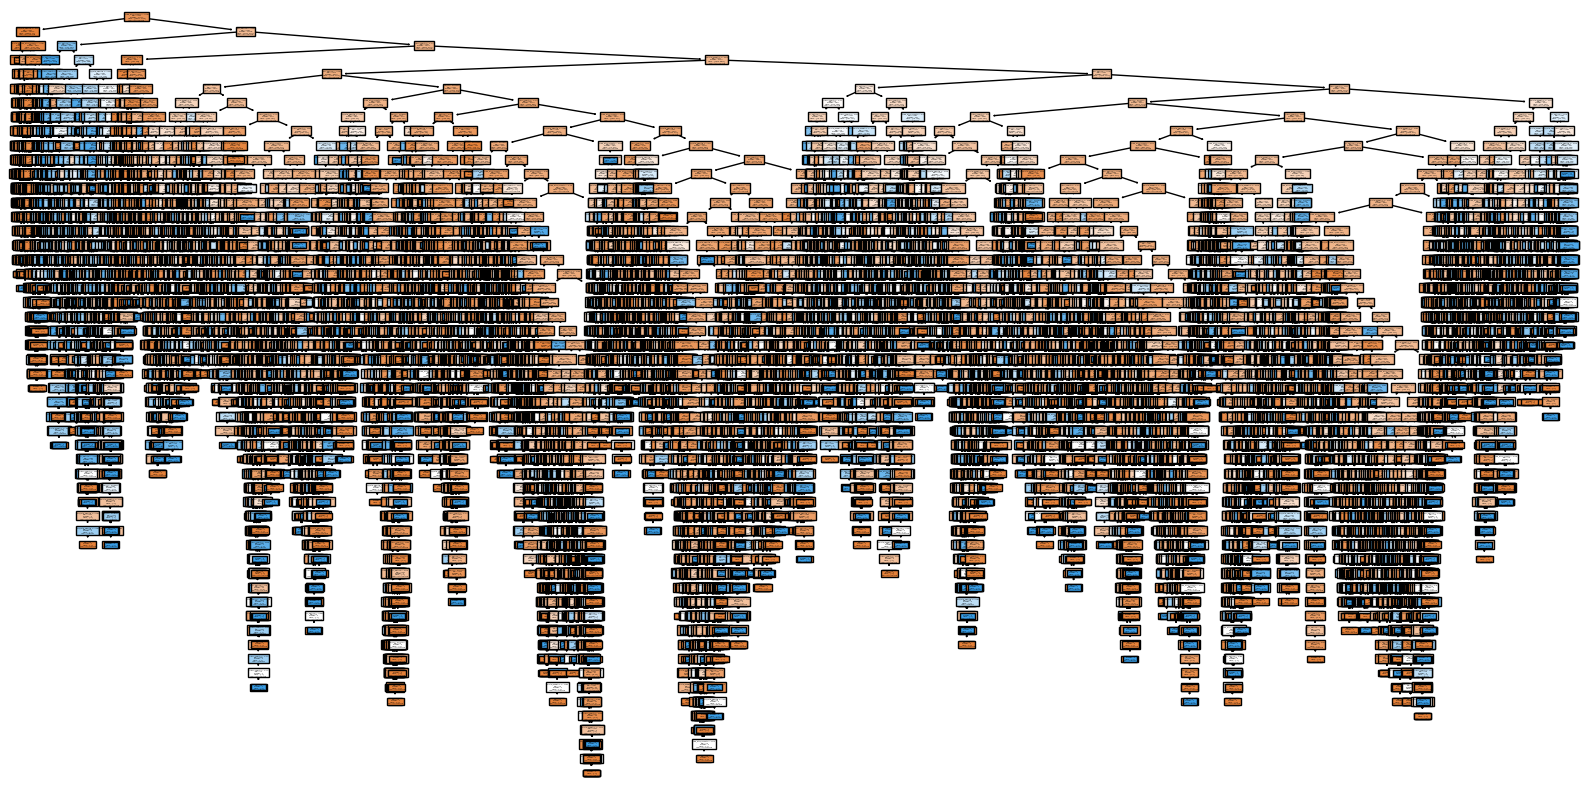

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the classification tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
# Combine the predictions with the neo_ids for easy identification
results = pd.DataFrame({'neo_id': X_test.index, 'is_hazardous_pred': y_pred})
print(results.head())

In [ ]:
'''Find Best parameters of tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'max_depth': [ 5, 10, 15, 20],        # Control tree depth
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum samples required at a leaf node
    'max_leaf_nodes': [2, 4, 5, 10]   # Maximum number of leaf nodes
}

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the best model on the full training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

'''

'Find Best parameters of tree\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\nparam_grid = {\n    \'max_depth\': [ 5, 10, 15, 20],        # Control tree depth\n    \'min_samples_split\': [2, 5, 10],           # Minimum samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 5],             # Minimum samples required at a leaf node\n    \'max_leaf_nodes\': [2, 4, 5, 10]   # Maximum number of leaf nodes\n}\n\n# Initialize DecisionTreeClassifier\nclf = DecisionTreeClassifier(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(estimator=clf, param_grid=param_grid, \n                           cv=5, n_jobs=-1, verbose=2, scoring=\'accuracy\')\n\n# Fit GridSearchCV to the data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\nprint(f"Best parameters found: {best_params}")\n\n# Train the best model on the fu

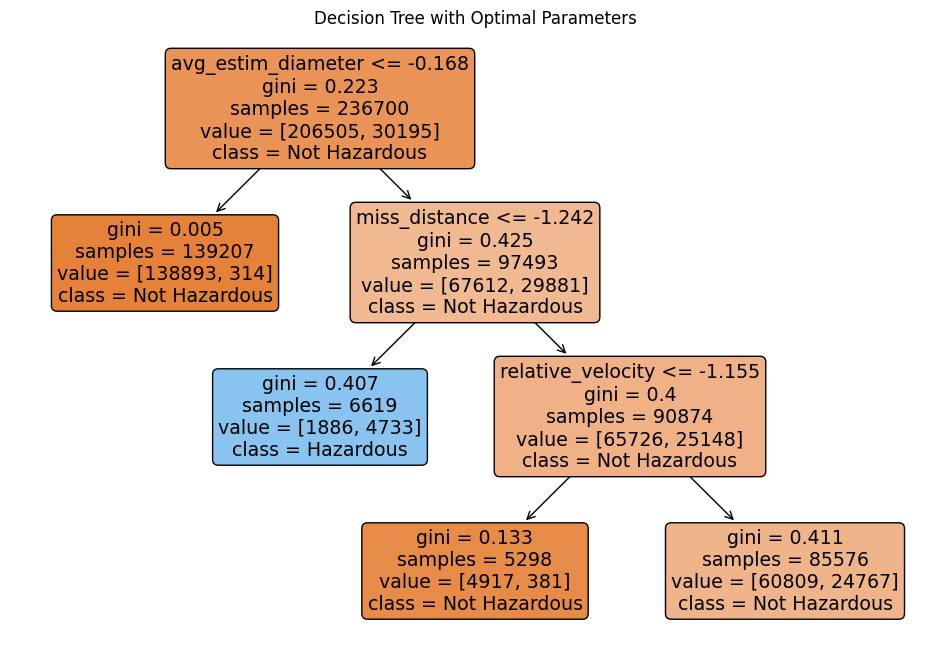

In [ ]:
# Test Optimal Tree
from matplotlib.patches import Patch
# Initialize and train the DecisionTreeClassifier with the best parameters
best_clf = DecisionTreeClassifier(
    max_depth=5,              # Best max_depth
    max_leaf_nodes=4,         # Best max_leaf_nodes
    min_samples_leaf=1,       # Best min_samples_leaf
    min_samples_split=2,      # Best min_samples_split
    random_state=42
)
best_clf.fit(X_train, y_train)

# Create a custom legend
legend_labels = [
    Patch(color='orange', label='Not Hazardous'),
    Patch(color='blue', label='Hazardous')
]
plt.figure(figsize=(12, 8))
plt.legend(handles=legend_labels, loc='upper right')
plot_tree(best_clf, filled=True, rounded=True, feature_names=X_train.columns, class_names=['Not Hazardous', 'Hazardous'])
plt.title("Decision Tree with Optimal Parameters")
plt.show()